In [2]:
import numpy as np
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
from bvhpython.bvh import Bvh
from scipy.interpolate import interp1d
import os
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.losses import SparseCategoricalCrossentropy, mse, CategoricalCrossentropy
from keras.activations import relu
from keras.layers.normalization import BatchNormalization
import datetime
from sklearn.metrics import confusion_matrix

%run Gestion_temps.ipynb


%run Gestion_temps.ipynb
%run modelisation.ipynb
%run bvh_extract.ipynb
%run algo_genetique.ipynb
%load_ext tensorboard

In [3]:
%run bvh_extract.ipynb
bed = bvh_extract_data(9000,240,"data/own_data/")

FileNotFoundError: [Errno 2] No such file or directory: 'data/own_data/'

In [4]:
(x_train_tmp, y_train, x_test_tmp, y_test) = bed.create_database(0,0)

x_train_tmp /= np.amax(x_train_tmp)
x_test_tmp /= np.amax(x_test_tmp)

y_train

NameError: name 'bed' is not defined

In [5]:
from bvhpython.bvh import Bvh

import pandas as pd
import os
import numpy as np

class bvh_to_csv:
    
    def _bvh_files(self,path):
        # lors du parcours d'un dossier
        # on recupere que les fichiers avec l'extension .bvh
        # pour pouvoir parcourir ensuite tous les fichiers à extraire
        file_list = os.listdir(path)
        for f in os.listdir(path):
            path_f = path + f
            fileName, fileExtension = os.path.splitext(path_f)
            if fileExtension != '.bvh':
                file_list.remove(f)

        return file_list
    
    def extract_file(self,path,file,path_to_save):
        # extraction d'un fichier bvh
        with open(path + '/'+ file) as m:
            bvh_file = Bvh(m.read()).frames
            mvt = np.array(bvh_file, dtype="float").T
            df = pd.DataFrame(mvt)
            df.to_csv(path_to_save+'/'+file+".csv")
            
    def extract_folder(self,path_folder,path_to_save):
        # extraction des fichiers bvh dans un dossier
        list_bvh_file = self._bvh_files(path_folder)
        for f in list_bvh_file:
            self.extract_file(path_folder,f,path_to_save)
            

In [6]:
btc = bvh_to_csv()
mvt_p_5 = btc.extract_file("data/own_data/marche parkinsonienne", 
                           "marche_p_5_aft_Char00.bvh", 
                           "data/own_data/marche parkinsonienne")

In [7]:
df = pd.DataFrame()
df = pd.read_csv("data/own_data/marche parkinsonienne/marche_p_5_aft_Char00.bvh.csv")


In [8]:
# extraction du bras droit pour x_train et x_test
# epaule droite : 79 - 84
# biceps droit : 85 - 90
# avant-bras droit : 91 - 96
# main droite : 97 - 102

bras_d = np.array(df[79:102])

bras_d

array([[ 7.9000000e+01,  7.3045900e+00,  7.3109160e+00, ...,
         7.2789720e+00,  7.2695190e+00,  7.3002620e+00],
       [ 8.0000000e+01, -3.2200000e-04,  2.0130000e-03, ...,
         5.1975000e-02,  5.9235000e-02,  3.1732000e-02],
       [ 8.1000000e+01, -6.3954500e-01, -5.8752800e-01, ...,
         2.1246283e+01,  2.1214638e+01,  2.1206490e+01],
       ...,
       [ 9.9000000e+01,  2.3924200e+00,  2.4717330e+00, ...,
        -3.2441900e-01, -2.8791600e-01, -2.8252300e-01],
       [ 1.0000000e+02,  1.5139775e+01,  1.5087324e+01, ...,
        -5.9776420e+00, -6.0091580e+00, -6.0156230e+00],
       [ 1.0100000e+02, -8.4430790e+00, -8.3783260e+00, ...,
        -5.2167490e+00, -5.2105180e+00, -5.2103100e+00]])

(4, 240, 9000)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 240, 30)           1083720   
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30)                120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 62        
Total params: 1,091,342
Trainable params: 1,091,222
Non-trainable params: 120
__________________________________________

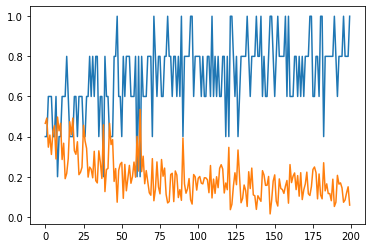

In [5]:
%run modelisation.ipynb
# %tensorboard --logdir logs/fit

md = motion_detection()
md.start('data', x_train, 
         y_train, 
         x_test, 
         y_test, 
         (30,30), 
         0.0001,
         200, 
         10,
         0.5,
         "tanh", 
         1, 
         0)


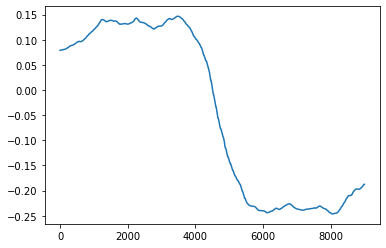

In [73]:
plt.plot(x_train[0,3])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 354, 43)           1555568   
_________________________________________________________________
batch_normalization_15 (Batc (None, 354, 43)           172       
_________________________________________________________________
lstm_50 (LSTM)               (None, 30)                8880      
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 62        
Total params: 1,564,682
Trainable params: 1,564,596
Non-trainable params: 86
_________________________________________________________________
None
Epoch 1/37
Epoch 2/37
Epoch 3/37
Epoch 4/37
Epoch 5/37
Epoch 6/37
Epoch 7/37
Epoch 8/37
Epoch 9/37
Epoch 10/37
Epoch 11/37
Epoch 12/37
Epoch 13/37
Epoch 14/37
Epoch 15/37
Epoch 16/37
Epoch 17/37
Epoch 18/37
Epoch 19/37
Epoch 20/37
Epoc

KeyboardInterrupt: 

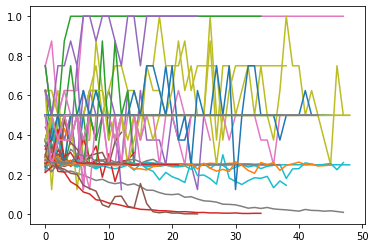

In [50]:
%run algo_genetique.ipynb

t = test('data', x_train, y_train, x_test, y_test)
t.start(10)

[-222.73712158 -222.75411987 -221.25302124 -220.48362732 -221.1158905
 -219.50312805 -219.40139771 -219.58151245 -218.80999756 -218.69155884
 -218.85389709 -219.81625366 -219.39605713 -222.20172119 -221.76835632
 -222.31994629 -222.35884094 -226.20680237 -224.71310425 -223.27893066
 -224.80448914 -225.16653442 -222.4690094  -222.87828064 -221.99227905
 -222.24784851 -223.00605774]
(48, 27)
[[-222.73712158 -222.75062022 -221.87112068 ... -222.56005231
  -223.16215964 -223.76426697]
 [ 540.99542236  541.14087812  541.87449736 ...  547.03614358
   549.80707326  552.57800293]
 [2832.40991211 2830.58223949 2828.99310662 ... 2820.44297162
  2819.51701804 2818.59106445]
 ...
 [ -18.1917305   -16.74520672  -16.7386156  ...  -15.58041516
   -19.64235325  -23.70429134]
 [-930.29620361 -934.23218491 -935.40111946 ... -938.12389778
  -926.61685001 -915.10980225]
 [2827.43798828 2826.27337287 2827.4635656  ... 2858.37966739
  2863.41773897 2868.45581055]]


(45, 35)

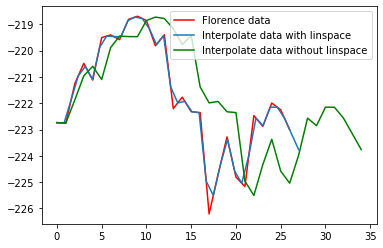

In [81]:
# Creation of the mvt data base of the Florence university

# Initialization of the mvt tab
# allow to use np.vstack() function of numpy lib
# vstack stack object of the same size

# mvts is a array of 3-column
# 1 => actor id
# 2 => category id
# 3 => mvt belonging to the two previous id's
mvts = np.array([0, 0, [[ x for x in range(nb_frame_max)] for y in range(45)]])

# browse of all id video
for n in unique:
    
    idvideo = int(n)
    
    # motion recovery
    tmp = mvt[mvt[:,0] == idvideo]
    
    # index 0 = idvideo
    # index 1 = idactor
    # index 2 = idcategory
    idcat = int(tmp[0,2])
    idactor = int(tmp[0,1])
    
    # id data removing
    tmp = tmp[:,3:]
    
    # preparing the normalized matrice
    m_n = np.zeros((nb_frame_max, 45))
    
    # nb frame of the motion
    dim_m = tmp.shape[0]
    
    i = 0
    # interpolation
    while i < tmp.shape[1]:
        f = interp1d(np.arange(dim_m), tmp[:,i], fill_value='extrapolate')
        m_n[:,i] = np.array(f(np.linspace(0, dim_m, nb_frame_max)))
        i += 1
    
    tmp = m_n
    # the mvt is transposed in order to have time-based coordinates 
    tmp = np.array([idactor, idcat, tmp.T])
    
    mvts = np.vstack([mvts, tmp])

# removing the first iteration of the mvt tab 
# which was created for vstack function
mvts = mvts[1:]

# comparision before / after
tmp = mvt[mvt[:,0] == 1].T
print(tmp[3])
print(tmp.shape)

# plot
plt.plot(tmp[3],'r-', label="Florence data")
plt.plot(np.linspace(0,27,nb_frame_max), mvts[0,2][0,:], label="Interpolate data with linspace")
plt.plot(mvts[0,2][0,:], 'g-', label="Interpolate data without linspace")
plt.legend()

print(mvts[0,2])
mvts[0,2].shape

In [82]:
# Creation of the train and test dataset

# train data contains all data except the data of actor one
tmp = mvts[mvts[:,0] != 1]
x_train = np.array([x[2] for x in tmp])
y_train = tmp[:,1]

# test data contains data of actor 1 only
tmp = mvts[mvts[:,0] == 1]
x_test =  np.array([x[2] for x in tmp])
y_test = np.array(tmp[:,1], dtype="int")


## 